In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [30]:
maper = {"M":1, "F":0, 1:0, 2:1, "YES":1, "NO":0}
df["AGE_Catagory"] = pd.cut(df["AGE"],bins=[0,20,40,65,120],labels=[0,1,2,3])
df_2 = df.drop(["AGE","AGE_Catagory"],axis=1)
df_2 = df_2.applymap(lambda x: maper.get(x))
df_2["AGE_catagory"] = df["AGE_Catagory"]
df_2

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_catagory
0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,3
1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,3
2,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,2
3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,2
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,2
305,1,1,0,0,0,0,1,1,1,1,1,1,0,1,1,3
306,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1,2
307,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,3


In [33]:
X = df_2.drop("LUNG_CANCER",axis=1)
y = df_2["LUNG_CANCER"]
ct = ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[-1])],remainder="passthrough")
X = ct.fit_transform(X)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 69ms/step - loss: 0.8888 - accuracy: 0.4805 - val_loss: 0.8954 - val_accuracy: 0.4359
Epoch 2/100
8/8 [==============================] - 0s 23ms/step - loss: 0.8779 - accuracy: 0.4848 - val_loss: 0.8853 - val_accuracy: 0.4359
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 0.8679 - accuracy: 0.4848 - val_loss: 0.8759 - val_accuracy: 0.4359
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.8577 - accuracy: 0.4935 - val_loss: 0.8663 - val_accuracy: 0.4359
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 0.8478 - accuracy: 0.4935 - val_loss: 0.8575 - val_accuracy: 0.4487
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 0.8382 - accuracy: 0.5065 - val_loss: 0.8487 - val_accuracy: 0.4615
Epoch 7/100
8/8 [==============================] - 0s 25ms/step - loss: 0.8290 - accuracy: 0.5065 - val_loss: 0.8396 - val_accuracy: 0.4744
Epoch 8/100
8/8 [===

In [36]:
print(f"train score : {model.evaluate(x_train,y_train)[1]}")
print(f"test score : {model.evaluate(x_test,y_test)[1]}")


8/8 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8788
train score : 0.8787878751754761
3/3 [==============================] - 0s 12ms/step - loss: 0.4617 - accuracy: 0.8077
test score : 0.807692289352417


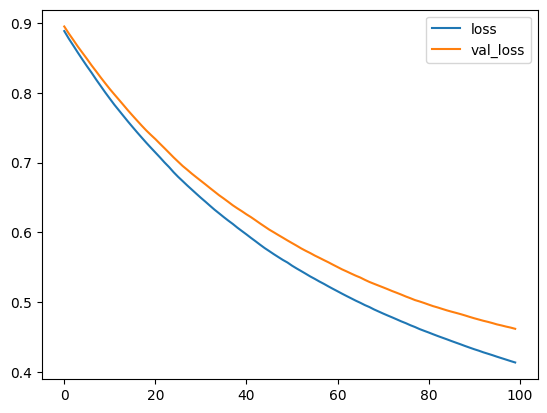

In [37]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

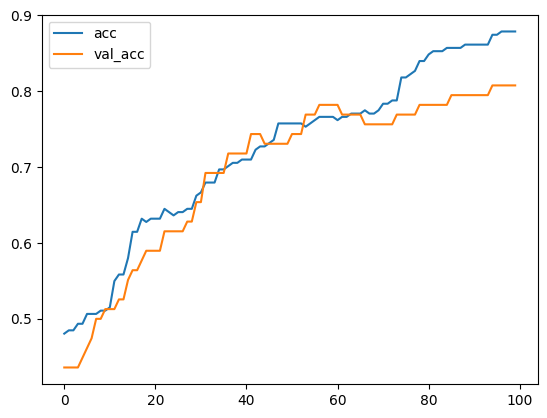

In [38]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [39]:
y_pred = model.predict(x_test)
y_pred = np.around(y_pred)
print(np.concatenate((y_pred.reshape(-1,1),y_test.values.reshape(-1,1)),1))

3/3 [==============================] - 0s 7ms/step
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]]


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))


[[ 8  5]
 [10 55]]
